# 0.5_ss_chap6
6章の実装　


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

In [4]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
%matplotlib inline

In [5]:
from src.common.gradient import numerical_gradient
from src.common.gradient import numerical_gradient_on_array

In [6]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

# 中身

In [7]:
class SGD:
    ''' Simple stochasitc gradient descent
    '''
    def __init__(self, lr=0.01):
        self.lr = lr
    
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]
    

### 関数を書いてみる

In [8]:
def bowl(x):
        ''' f(x,y) = 1/20 * x[0]^2 + x[1]^2
        ベクトルで入ってきた場合と、2次元（マトリックス）で入ってき場合に対応する
        -> どんな形でも、結局これだけで対応できちゃう

        Parameters
        ----------
        x: np.ndarray
        x values
        y: np.ndarray
        y values

        Returns
        -------
        f(x,y) = 1/20 * x^2 + y^2
        '''
        # takes numpy as input
        if type(x) != np.ndarray:
                raise ValueError("Only takes numpy.array as input")

        return 1/20*x[0]**2 + x[1]**2


In [9]:
def bowl_grad(x):
        ''' Check that numerical gradient is correct
        f(x,y) = 1/20 * x^2 + y^2
        df/dx = x/10
        df/dy = 2*y
        '''
        # takes numpy as input
        if type(x) != np.ndarray:
                raise ValueError("Only takes numpy.array as input")

        # 点
        if x.ndim == 1:
                dx = x[0] / 10
                dy = x[1] * 2
                return np.array([dx, dy])

        # それ以上　
        raise ValueError("Not implemented")

### 勾配を書いてみる

# あの numerical_gradient の中身はなんなんだ
- 点ごとにgradを返す仕様だった 

In [10]:
x_debug = np.mgrid[-2:-1.5:.25, -2:-1.5:.25].T.reshape(-1, 2)

In [11]:
numerical_gradient_on_array(bowl, x_debug)

2018-11-16 00:51:11,789 - src.common.gradient - INFO - Calculate gradient on bowl
2018-11-16 00:51:11,791 - src.common.gradient - INFO - Shape of input is (4, 2)


array([[-0.2  , -4.   ],
       [-0.175, -4.   ],
       [-0.2  , -3.5  ],
       [-0.175, -3.5  ]])

# 勾配計算、表示

In [61]:
X, Y = np.mgrid[-2:2.5:.25, -2:2.5:.25]
# 平にしてしまう
X = X.flatten()
Y = Y.flatten()
X.shape

(324,)

In [62]:
x_input = np.array([X, Y]).T.reshape(-1, 2)
x_input[0:5]

array([[-2.  , -2.  ],
       [-2.  , -1.75],
       [-2.  , -1.5 ],
       [-2.  , -1.25],
       [-2.  , -1.  ]])

In [63]:
grad = numerical_gradient_on_array(bowl, x_input)
grad.shape

2018-11-16 01:00:26,972 - src.common.gradient - INFO - Calculate gradient on bowl
2018-11-16 01:00:26,974 - src.common.gradient - INFO - Shape of input is (324, 2)


(324, 2)

In [64]:
grad[0:5]

array([[-0.2, -4. ],
       [-0.2, -3.5],
       [-0.2, -3. ],
       [-0.2, -2.5],
       [-0.2, -2. ]])

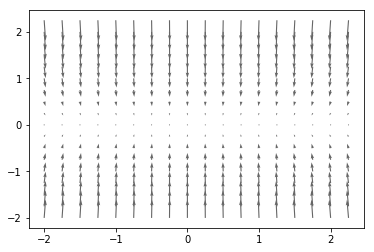

In [65]:
plt.quiver(X, Y, -grad.T[0], -grad.T[1], angles="xy", color="#666666")

# 同心円的な

<module 'matplotlib.pyplot' from '/Users/shotashimizu/.pyenv/versions/3.7.0/envs/deep-cnn/lib/python3.7/site-packages/matplotlib/pyplot.py'>

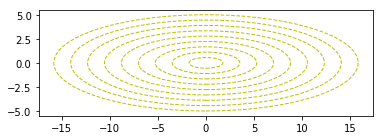

In [107]:
fig, ax = plt.subplots()

def plot_circles():

    # fc = face color, ec = edge color
    h = 0.1
    for h in np.linspace(0, 10, 10):
            e = patches.Ellipse(xy=(0, 0), width=h*np.sqrt(10), height=h, 
                        fill=False, ec='y', linestyle="--")
            ax.add_patch(e)

    plt.axis('scaled')
    # ax.set_aspect('equal')
    
    return plt

plot_circles()

In [67]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

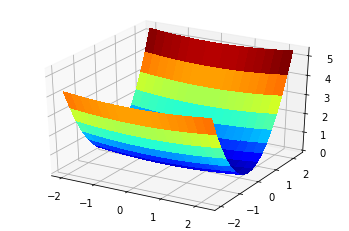

In [81]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.mgrid[-2:2.5:.25, -2:2.5:.25]
Z = bowl(np.array([X, Y]))
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                       cmap=cm.jet,linewidth=0.1, antialiased=False)

## SGD を描画する

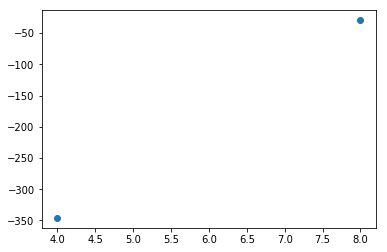

In [143]:
x = np.array([8, 4])

lr = 1e-2
steps = 20
results = np.zeros((steps, 2))

for i in range(20):
    results[i] = x.copy()
    x = x - numerical_gradient(bowl, x) * lr

fig, ax = plt.subplots()
# plot_circles()

plt.scatter(results[0], results[1])

In [144]:
results

array([[   8.        ,    4.        ],
       [ -29.5       , -346.        ],
       [ -29.4705    , -339.08      ],
       [ -29.4410295 , -332.2984    ],
       [ -29.41158847, -325.652432  ],
       [ -29.38217688, -319.13938337],
       [ -29.35279471, -312.7565957 ],
       [ -29.32344191, -306.50146379],
       [ -29.29411847, -300.37143451],
       [ -29.26482435, -294.36400582],
       [ -29.23555953, -288.47672571],
       [ -29.20632397, -282.7071912 ],
       [ -29.17711764, -277.05304737],
       [ -29.14794052, -271.51198643],
       [ -29.11879258, -266.0817467 ],
       [ -29.08967379, -260.76011177],
       [ -29.06058412, -255.54490953],
       [ -29.03152353, -250.43401134],
       [ -29.00249201, -245.42533112],
       [ -28.97348952, -240.51682449]])